In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
sns.set()

Read data from file

In [2]:
all_tracks_df = pd.read_pickle("../data/spotify_dataset_all.pkl")

In [3]:
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995,0.943,0.0736,0.2440,130.253,184853,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995,0.887,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,classical,0.1590,0.04010,7,-27.516,1,0.0446,0.984,0.760,0.1560,0.1060,106.239,462627,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994,0.901,0.0823,0.0634,69.043,378733,4


Normalise values

In [4]:
normalised_vals_df = all_tracks_df.loc[:, all_tracks_df.columns != 'genre']
normalised_vals_df = (normalised_vals_df - normalised_vals_df.min())/(normalised_vals_df.max() - normalised_vals_df.min())
all_tracks_df = pd.merge(all_tracks_df[['genre']], normalised_vals_df, left_index=True, right_index=True)
all_tracks_df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,classical,0.035683,0.032810,0.181818,0.441113,0.0,0.101165,0.930723,0.845214,0.084732,0.029023,0.148602,0.084694,0.50
5bu9A6uphPWg39RC3ZKeku,classical,0.426247,0.013053,0.363636,0.308423,0.0,0.076801,0.998996,0.960285,0.062150,0.229169,0.521763,0.062907,0.75
3DNRdudZ2SstnDCVKFdXxG,classical,0.133406,0.004398,0.090909,0.144985,0.0,0.055085,0.998996,0.903259,0.165113,0.132425,0.761220,0.189824,0.50
67TCAXIe154ZGDNaWceqxC,classical,0.106291,0.039328,0.636364,0.363290,1.0,0.058792,0.987952,0.773931,0.147504,0.085613,0.379284,0.332902,0.75
1Oo7XEqkrwifJn17aA0ocF,classical,0.258134,0.005391,0.818182,0.286991,1.0,0.067267,0.997992,0.917515,0.071162,0.041298,0.158594,0.251357,0.75


Change all genres except country to other

In [5]:
all_tracks_df.loc[all_tracks_df['genre'] != 'country', 'genre'] = 'other'

Look at genre distribution

<AxesSubplot:ylabel='genre'>

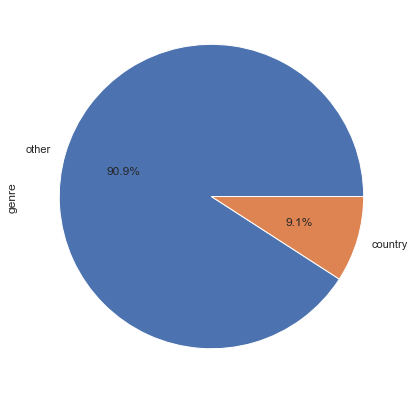

In [6]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

In [7]:
all_tracks_df['genre'].value_counts()

other      6004
country     603
Name: genre, dtype: int64

Resample data

In [8]:
pop_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'country'].sample(n=600, random_state=1)
other_sample_df = all_tracks_df.loc[all_tracks_df['genre'] == 'other'].sample(n=600, random_state=1)
resampled_tracks_df = pd.concat([pop_sample_df, other_sample_df])
resampled_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3GDpfMuo5SBJUNFD9TrMOL,country,0.672451,0.543684,0.181818,0.701364,1.0,0.044227,0.230921,0.001222,0.085768,0.753459,0.644307,0.121603,0.75
7nyjRWYY6R98A7qupjv3Lm,country,0.633406,0.649990,0.000000,0.667727,1.0,0.055879,0.798192,0.000840,0.176507,0.929262,0.275904,0.056205,0.75
5g12xHasIIOu6rNGQ933qT,country,0.482646,0.109431,0.454545,0.585022,1.0,0.021981,0.351403,0.001466,0.129894,0.191720,0.167559,0.131219,0.50
0VeI4Zyirc6yuJ4P7fudjE,country,0.510846,0.816471,0.727273,0.848857,1.0,0.044492,0.030218,0.000000,0.060597,0.543327,0.637311,0.151968,0.75
58UKC45GPNTflCN6nwCUeF,country,0.635575,0.766326,0.090909,0.834860,1.0,0.099576,0.111443,0.000000,0.312202,0.864766,0.223568,0.040552,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7qHAjAL7CpadaZLamuBZRm,other,0.674620,0.741254,1.000000,0.844221,0.0,0.063030,0.002286,0.000000,0.232443,0.651514,0.517384,0.157113,0.75
2xt2piJx6jlFkjS77YiqpL,other,0.599783,0.568756,0.636364,0.856852,0.0,0.013771,0.007999,0.000000,0.089186,0.512119,0.388836,0.168959,0.75
2oxtQ84p1j5GmyzmD50Lq0,other,0.862256,0.755294,0.636364,0.918415,0.0,0.050847,0.029515,0.000015,0.199296,0.726412,0.330507,0.112829,0.75
6JPzlzHHdqIdmu28qBHdGF,other,0.261388,0.003605,0.545455,0.269500,1.0,0.063294,0.998996,0.855397,0.032525,0.022366,0.170537,0.082477,0.75


<AxesSubplot:ylabel='genre'>

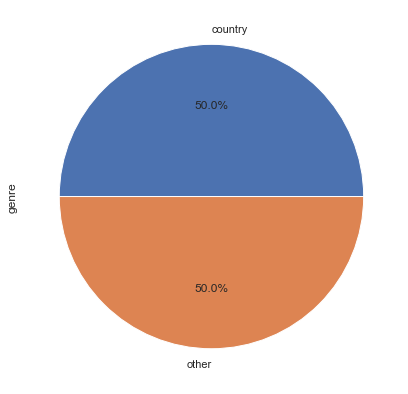

In [9]:
resampled_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7))

See summary statistics

In [10]:
resampled_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.583472,0.609830,0.492652,0.790580,0.750000,0.127692,0.276314,0.065297,0.163694,0.526829,0.469304,0.105131,0.736667
std,0.172519,0.224197,0.317058,0.111345,0.433193,0.195686,0.285159,0.213391,0.139635,0.249035,0.175612,0.069845,0.077285
min,0.007267,0.003605,0.000000,0.120350,0.000000,0.000265,0.000006,0.000000,0.003108,0.009050,0.090261,0.001086,0.000000
25%,0.483460,0.472227,0.181818,0.754272,0.750000,0.023239,0.046784,0.000000,0.081184,0.334235,0.325160,0.068144,0.750000
50%,0.597614,0.645477,0.545455,0.822699,1.000000,0.047537,0.169676,0.000001,0.110213,0.534485,0.465733,0.093013,0.750000
75%,0.698482,0.788390,0.727273,0.863184,1.000000,0.108514,0.433733,0.000149,0.201626,0.727452,0.585096,0.124626,0.750000
max,0.986985,0.989971,1.000000,0.973619,1.000000,0.973517,0.998996,0.964358,0.997928,0.996879,0.971016,0.936444,1.000000


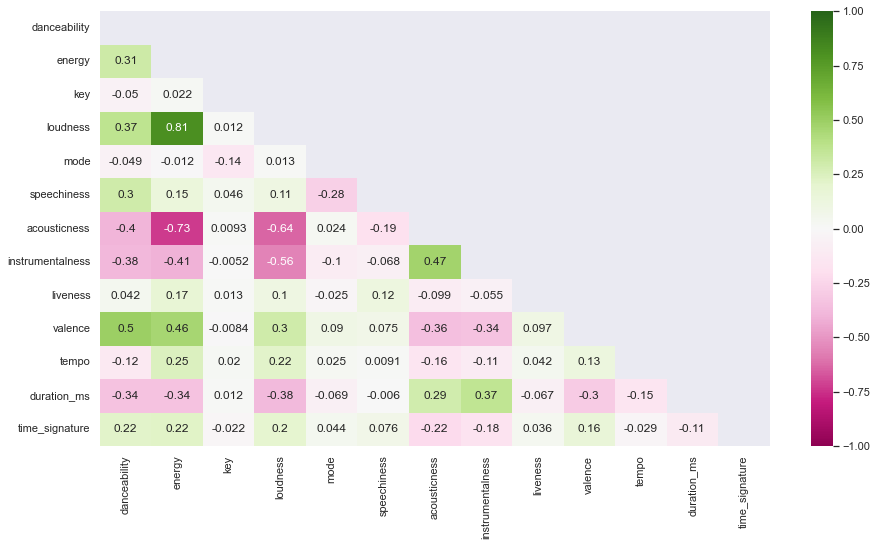

In [11]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(resampled_tracks_df.corr(), dtype=bool))
sns.heatmap(resampled_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");

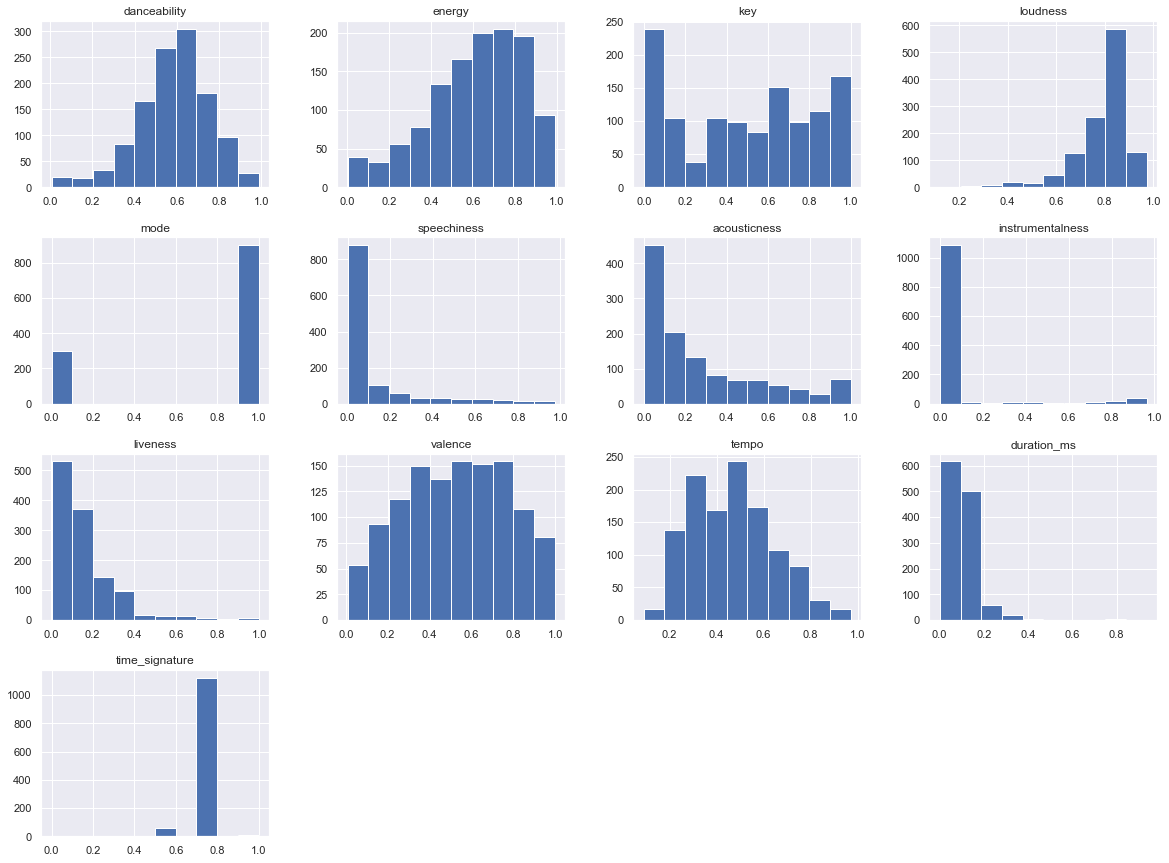

In [12]:
resampled_tracks_df.hist(figsize=(20,15));

Split data

In [13]:
# Feature variables
X = resampled_tracks_df.loc[:, resampled_tracks_df.columns != 'genre']
# Target variable
y = resampled_tracks_df['genre']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Decision Tree

In [15]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train, y_train)

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


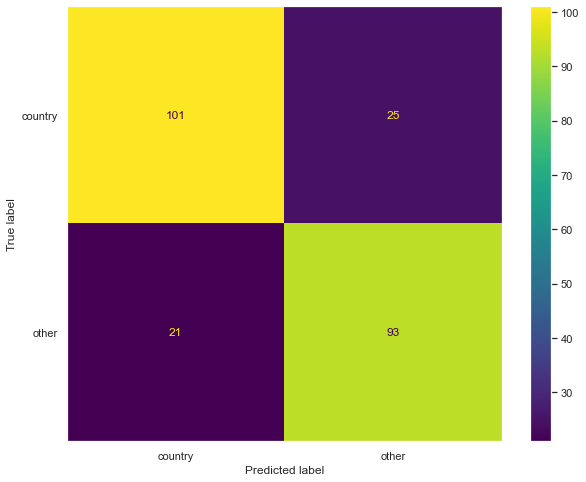

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=dt_clf.classes_, ax=ax);


Pruning decision tree

In [17]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

dt_clfs = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dt_clfs.append(dt_clf)

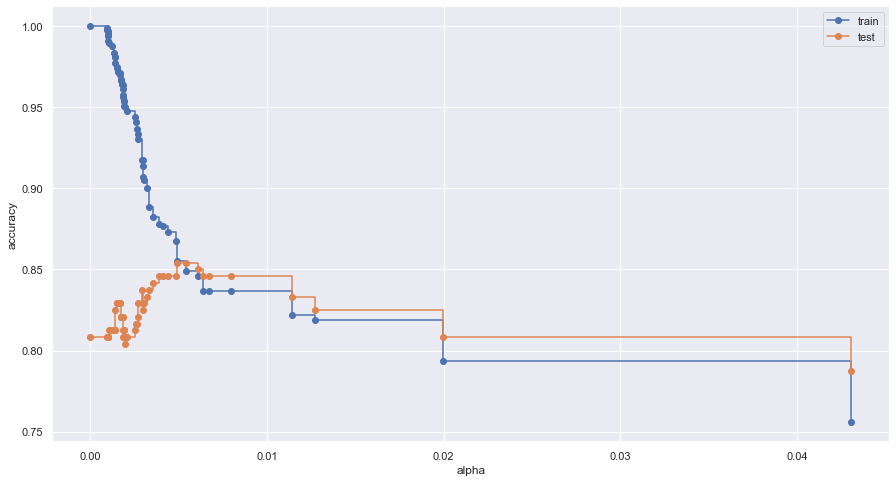

In [18]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dt_clfs]

fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

In [19]:
best_ccp = ccp_alphas[np.argmax(test_scores)]
best_ccp

0.004906148688476268

Cross Validation

<AxesSubplot:xlabel='tree'>

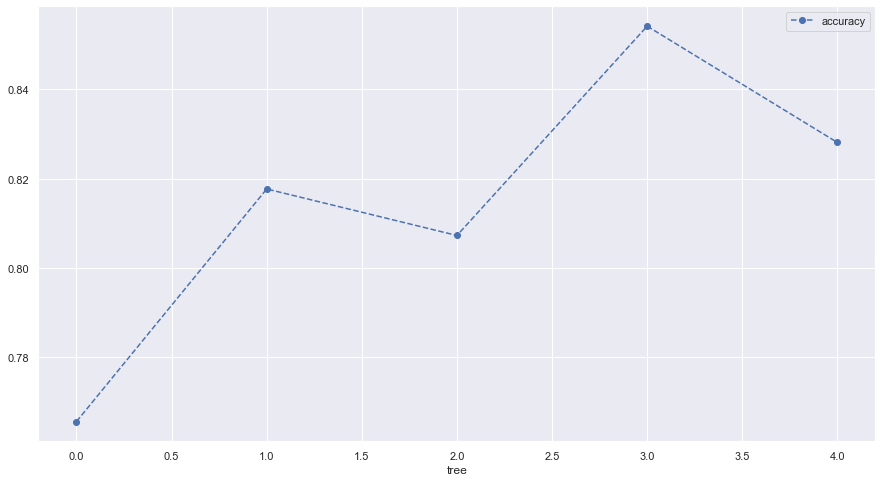

In [20]:
dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=best_ccp)
scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
fig, ax = plt.subplots(figsize=(15,8))
df.plot(x='tree', y='accuracy', marker='o', linestyle='--', ax=ax)

Above shows alpha is sensitive to different training/testing data.

<AxesSubplot:xlabel='alpha'>

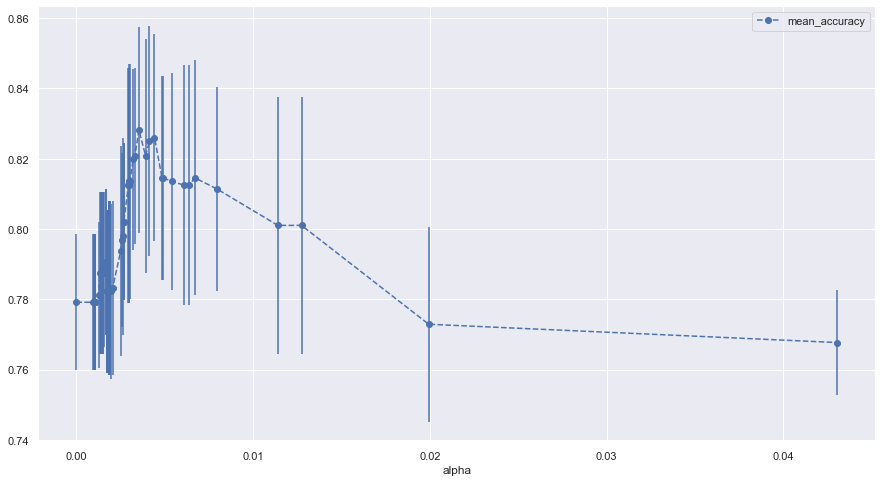

In [21]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
fig, ax = plt.subplots(figsize=(15,8))
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--', ax=ax)

In [22]:
ideal_ccp = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_ccp

0.0035332046147978635

Building final tree

c:\Users\JD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


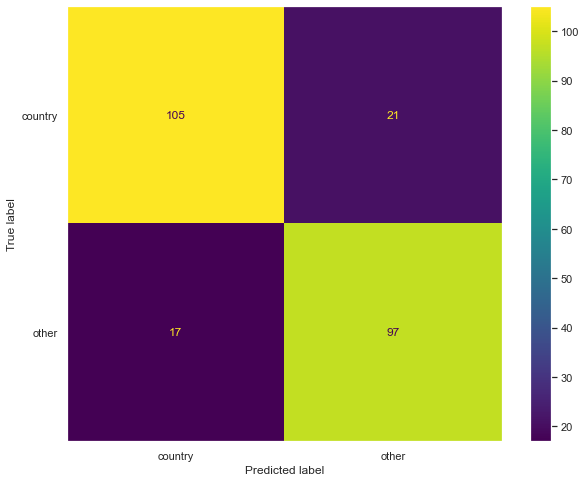

In [23]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=ideal_ccp)
dt_clf_pruned = dt_clf_pruned.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid(False)
metrics.plot_confusion_matrix(dt_clf_pruned, X_test, y_test, display_labels=dt_clf_pruned.classes_, ax=ax);

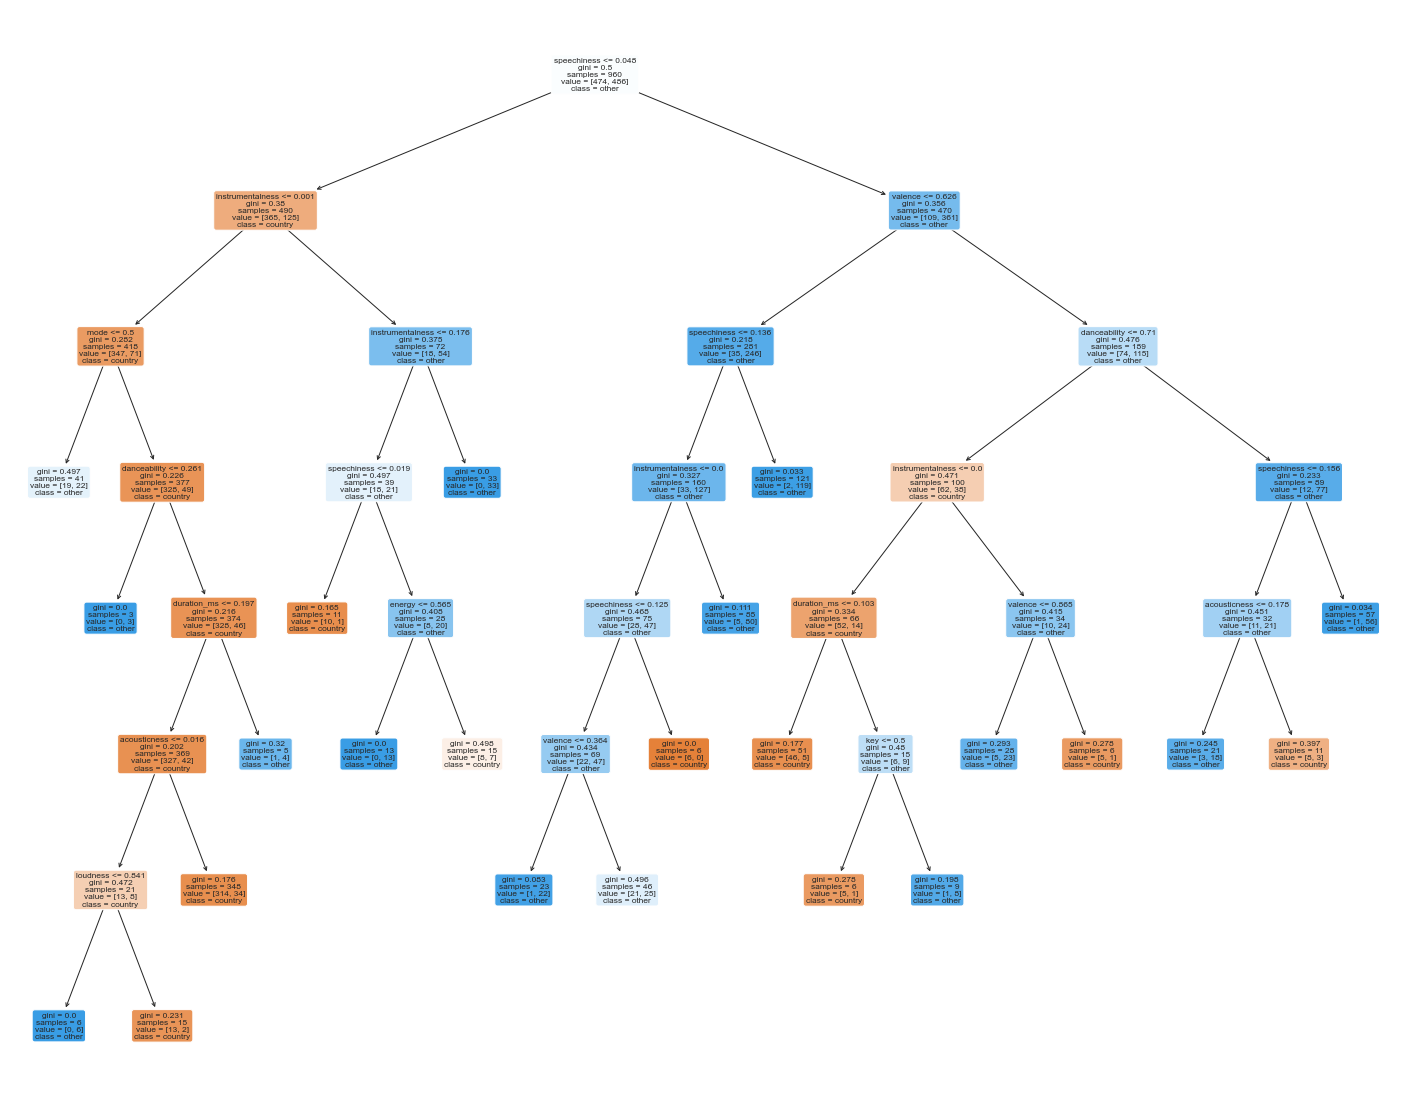

In [24]:
plt.figure(figsize=(25,20))
plot_tree(dt_clf_pruned, filled=True, rounded=True, class_names=dt_clf_pruned.classes_, feature_names=X.columns);

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [27]:
df = pd.read_pickle("../data/spotify_dataset_all.pkl")
df.loc[df['genre'] != 'country', 'genre'] = 0
df.loc[df['genre'] == 'country', 'genre'] = 1
df['genre'] = df['genre'].astype(int)
pdf = df.loc[df['genre'] == 1].sample(n=600, random_state=1)
odf = df.loc[df['genre'] == 0].sample(n=600, random_state=1)
df = pd.concat([pdf, odf])
df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3GDpfMuo5SBJUNFD9TrMOL,1,0.681,0.54300,2,-12.420,1,0.0391,0.23000,0.001200,0.0964,0.7480,150.907,245240,4
7nyjRWYY6R98A7qupjv3Lm,1,0.645,0.64900,0,-13.922,1,0.0435,0.79500,0.000825,0.1840,0.9170,88.815,177958,4
5g12xHasIIOu6rNGQ933qT,1,0.506,0.11000,5,-17.615,1,0.0307,0.35000,0.001440,0.1390,0.2080,70.554,255133,3
0VeI4Zyirc6yuJ4P7fudjE,1,0.532,0.81500,8,-5.834,1,0.0392,0.03010,0.000000,0.0721,0.5460,149.728,276480,4
58UKC45GPNTflCN6nwCUeF,1,0.647,0.76500,1,-6.459,1,0.0600,0.11100,0.000000,0.3150,0.8550,79.994,161853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7qHAjAL7CpadaZLamuBZRm,0,0.683,0.74000,11,-6.041,0,0.0462,0.00228,0.000000,0.2380,0.6500,129.515,281773,4
2xt2piJx6jlFkjS77YiqpL,0,0.614,0.56800,7,-5.477,0,0.0276,0.00797,0.000000,0.0997,0.5160,107.849,293960,4
2oxtQ84p1j5GmyzmD50Lq0,0,0.856,0.75400,7,-2.728,0,0.0416,0.02940,0.000015,0.2060,0.7220,98.018,236213,4
6JPzlzHHdqIdmu28qBHdGF,0,0.302,0.00448,6,-31.704,1,0.0463,0.99500,0.840000,0.0450,0.0452,71.056,204987,4


In [28]:
X = df.loc[:, df.columns != 'genre']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
lr = sm.Logit(y_train, X_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.386682
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  genre   No. Observations:                  960
Model:                          Logit   Df Residuals:                      947
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Jun 2022   Pseudo R-squ.:                  0.4421
Time:                        15:26:44   Log-Likelihood:                -371.22
converged:                       True   LL-Null:                       -665.35
Covariance Type:            nonrobust   LLR p-value:                3.400e-118
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        -2.3577      0.825     -2.857      0.004      -3.975      -0.740
energy              -0.4617      0.868     -0.532      0.595      -2.164       1.240
key                  0.0223      0.027      0.825      0.409      -0.031       0.075
loudness             0.0303      0.040      0.761      0.446      -0.048       0.108
mode                 1.9635      0.239      8.209      0.000       1.495       2.432
speechiness        -29.6349      3.678     -8.057      0.000     -36.844     -22.426
acousticness         1.9936      0.498      4.004      0.000       1.018       2.970
instrumentalness   -15.2150      4.479     -3.397      0.001     -23.993      -6.437
liveness            -0.3968      0.751     -0.529      0.597      -1.868       1.074
valence              2.8826      0.541      5.323      0.000       1.821       3.944
tempo                0.0049      0.003      1.526      0.127      -0.001       0.011
duration_ms      -8.051e-06   1.99e-06     -4.048      0.000   -1.19e-05   -4.15e-06
time_signature       0.3489      0.254      1.376      0.169      -0.148       0.846
====================================================================================
"""